In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('cdc.csv')

In [7]:
# How many observations are there in this dataset?
df.shape[0]

9

In [9]:
# Display the first 10 rows.
df.head(10)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f
5,very good,1,1,0,64,114,114,55,f
6,very good,1,1,0,71,194,185,31,m
7,very good,0,1,0,67,170,160,45,m
8,good,0,1,1,65,150,130,27,f
9,good,1,1,0,70,180,170,44,m


In [22]:
# How many variables are there in this dataset? For each variable, 
# identify its data type (e.g., categorical, numerical).
len(df.columns)

9

In [23]:
df.dtypes

genhlth     object
exerany      int64
hlthplan     int64
smoke100     int64
height       int64
weight       int64
wtdesire     int64
age          int64
gender      object
dtype: object

In [33]:
# State how many levels each categorical variable has. Print all the levels for each categorical variable.
catagorical_variables = ['genhlth', 'exerany', 'hlthplan', 'smoke100', 'gender']

for col in catagorical_variables:
    print(f'There are {df[col].nunique()} levels for {col}:')
    print(f'{df[col].unique()}\n')
    

There are 5 levels for genhlth:
['good' 'very good' 'excellent' 'fair' 'poor']

There are 2 levels for exerany:
[0 1]

There are 2 levels for hlthplan:
[1 0]

There are 2 levels for smoke100:
[0 1]

There are 2 levels for gender:
['m' 'f']



In [35]:
# Find the mean, sample standard deviation, and median of weight.

round(df.describe(), 2)

,exerany,hlthplan,smoke100,height,weight,wtdesire,age
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,0.75,0.87,0.47,67.18,169.68,155.09,45.07
std,0.44,0.33,0.50,4.13,40.08,32.01,17.19
min,0.00,0.00,0.00,48.00,68.00,68.00,18.00
25%,0.00,1.00,0.00,64.00,140.00,130.00,31.00
50%,1.00,1.00,0.00,67.00,165.00,150.00,43.00
75%,1.00,1.00,1.00,70.00,190.00,175.00,57.00
max,1.00,1.00,1.00,93.00,500.00,680.00,99.00


In [45]:
print('Mean:', round(df['weight'].mean(), 2))
print('Median:', round(df['weight'].median(), 2))
print('Stadard Deviation:', round(df['weight'].std(), 2))

Mean: 169.68
Median: 165.0
Stadard Deviation: 40.08


In [46]:
# Find the mean, sample standard deviation, and median of weight for respondents who exercised in the past month.
print('Mean:', round(df[df['exerany'] == 1]['weight'].mean(), 2))
print('Median:', round(df[df['exerany'] == 1]['weight'].median(), 2))
print('Stadard Deviation:', round(df[df['exerany'] == 1]['weight'].std(), 2))

Mean: 169.04
Median: 165.0
Stadard Deviation: 38.83


In [52]:
# Compute the 5-number summary for wtdesire, respondent's desired weight in pound,
# in ascending order (that is, min, Q1, Q2 (median), Q3, and max). Also compute the
# interquartile range (IQR) for this variable (which is Q3-Q1).
round(df['wtdesire'].describe(),2)
# or
min_val = df['wtdesire'].min()
q1_val = df['wtdesire'].quantile(0.25)
q2_val = df['wtdesire'].quantile(0.50)
q3_val = df['wtdesire'].quantile(0.75)
max_val = df['wtdesire'].max()
iqr = q3_val - q1_val

print(f'Min: {min_val}')
print(f'Q1: {q1_val}')
print(f'Q2: {q2_val}')
print(f'Q3: {q3_val}')
print(f'Max: {max_val}')
print(f'IQR: {iqr}')

Min: 68
Q1: 130.0
Q2: 150.0
Q3: 175.0
Max: 680
IQR: 45.0


In [54]:
# In addition, compute max upper whisker reach and max lower whisker reach.
# Based on these values, how many outliers are there for wtdesire? Finally,
# using Matplotlib, create a boxplot for this variable.
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
print(f'Max whisker: {max_whisker}')
print(f'Min whisker: {min_whisker}')


Max whisker: 242.5
Min whisker: 62.5


In [57]:
wtdesire_outliers = df[(df['wtdesire'] > max_whisker) | (df['wtdesire'] < min_whisker)]['wtdesire']
# print the top five
print(wtdesire_outliers.sort_values(ascending = False).head())
print(f'Number of "wtdesire" outliers: {wtdesire_outliers.shape[0]}')

16873    680
10033    601
13606    350
1615     325
9110     325
Name: wtdesire, dtype: int64
Number of "wtdesire" outliers: 175


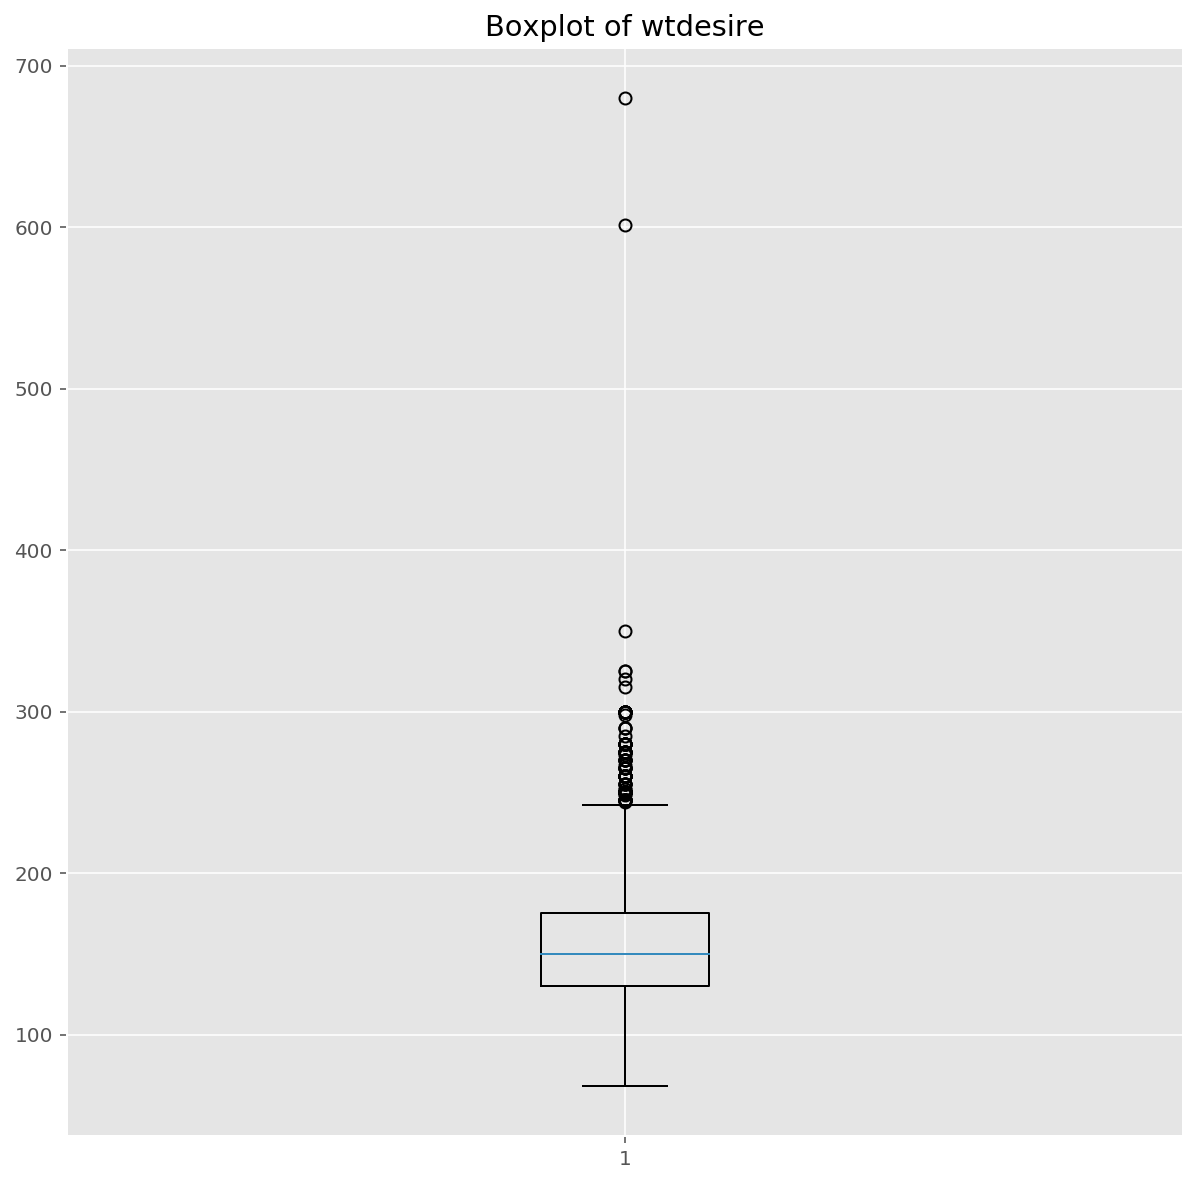

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (10, 10)

plt.boxplot(x = df['wtdesire'])
plt.title("Boxplot of wtdesire")
plt.show();

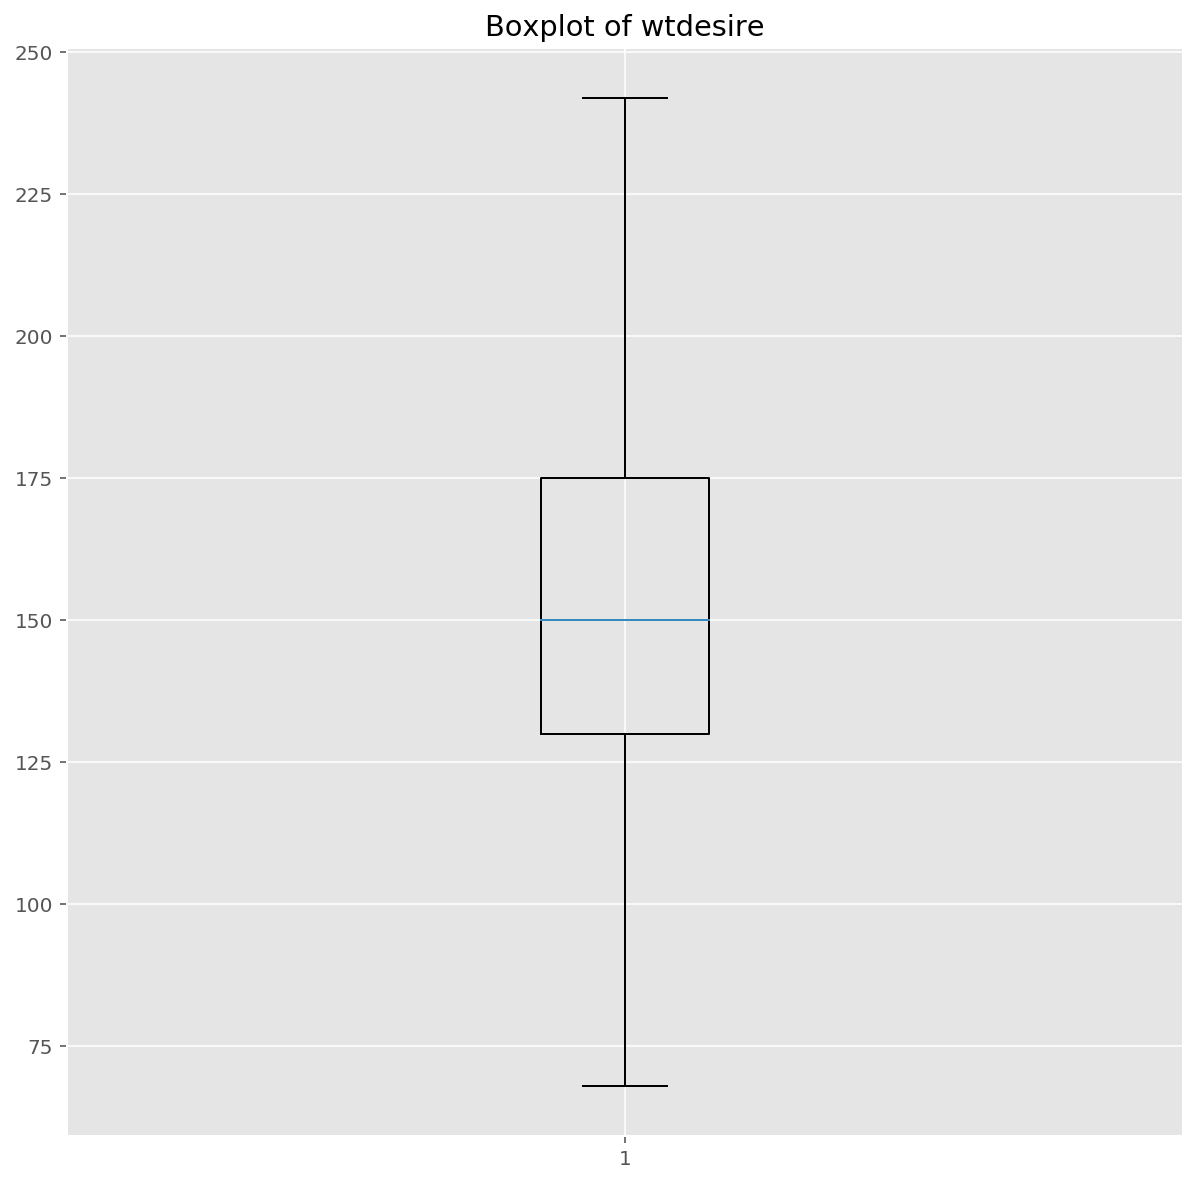

In [69]:
# or without the outlier which just looks better
plt.boxplot(x = df['wtdesire'], showfliers=False)
plt.title("Boxplot of wtdesire")
plt.show();

In [71]:
'''
Let's consider a new variable: the difference between desired weight (wtdesire) and current weight (weight).
Create this new variable by subtracting the two columns in the df data frame and assigning them to a new variable
called wdiff. Display the first 5 rows of df. How many columns are there?
'''
df['wdiff'] = df['weight'] - df['wtdesire']
df['wdiff'].head()

0     0
1    10
2     0
3     8
4    20
Name: wdiff, dtype: int64

In [75]:
# What percent of respondents' wdiff is zero? Comment on the result.

percent_happy = df[df['wdiff'] == 0].shape[0]/df.shape[0]*100

print(f'{percent_happy}% are happy witht their current weight.')

28.08% are happy witht their current weight.


In [77]:
'''
What percent of respondents think they are overweight, that is, their wdiff value is less than 0?
What percent of respondents think they are underweight?
'''
percent_over = df[df['wdiff'] > 0].shape[0]/df.shape[0]*100
percent_under = df[df['wdiff'] < 0].shape[0]/df.shape[0]*100

print(f'{percent_over}% of people think that they are overweight.')
print(f'{percent_under}% of people think that they are underweight.')


63.82% of people think that they are overweight.
8.1% of people think that they are underweight.


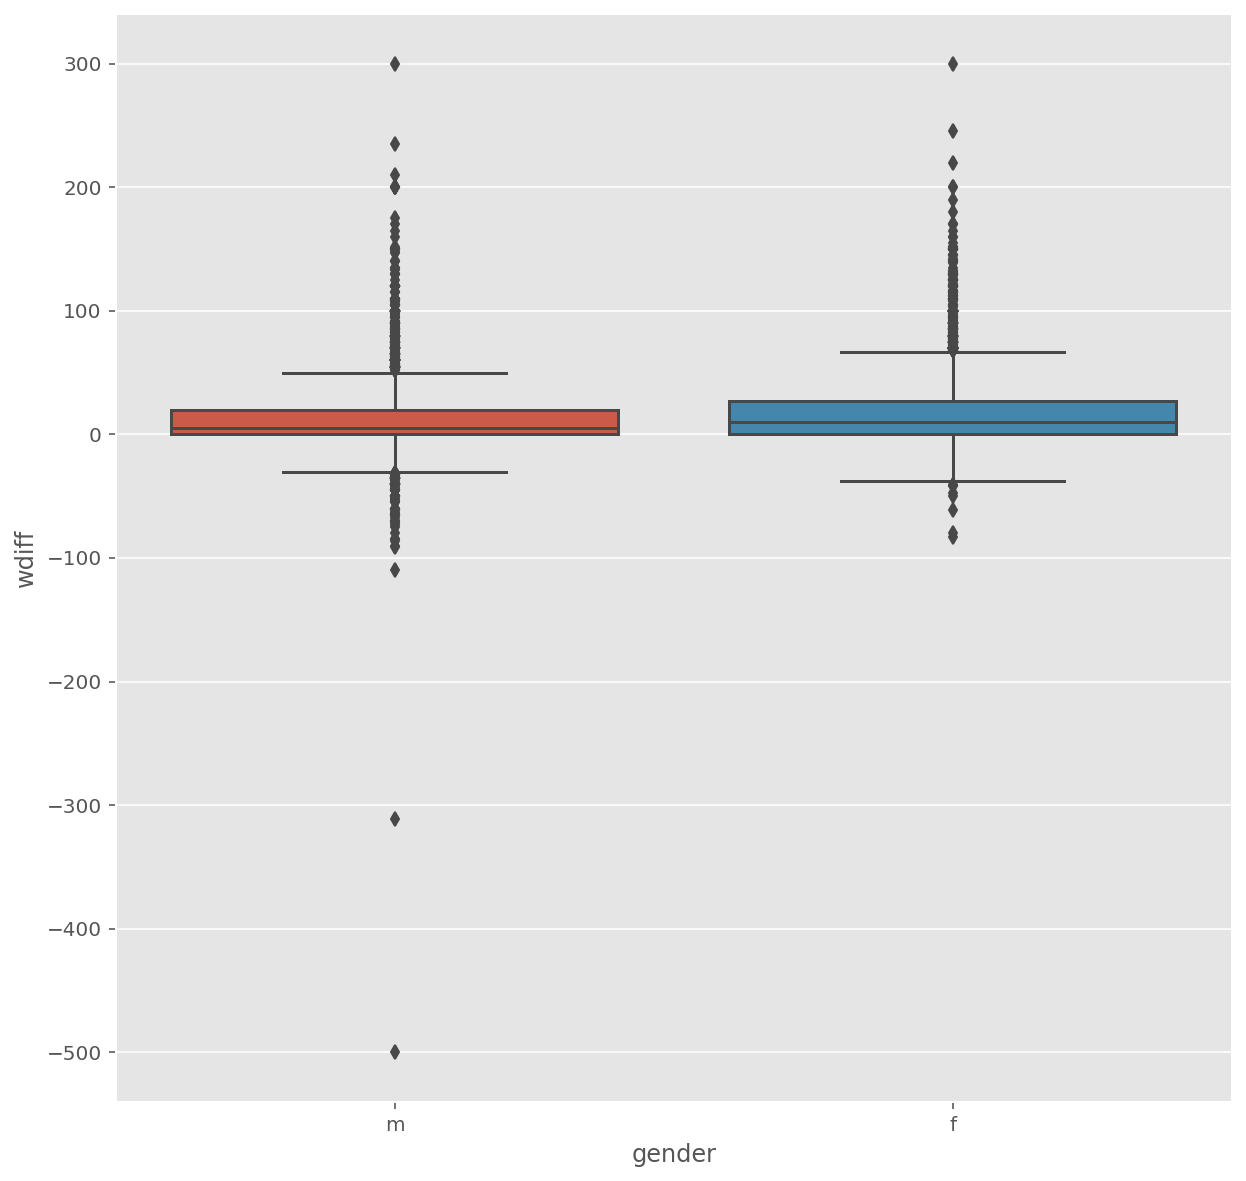

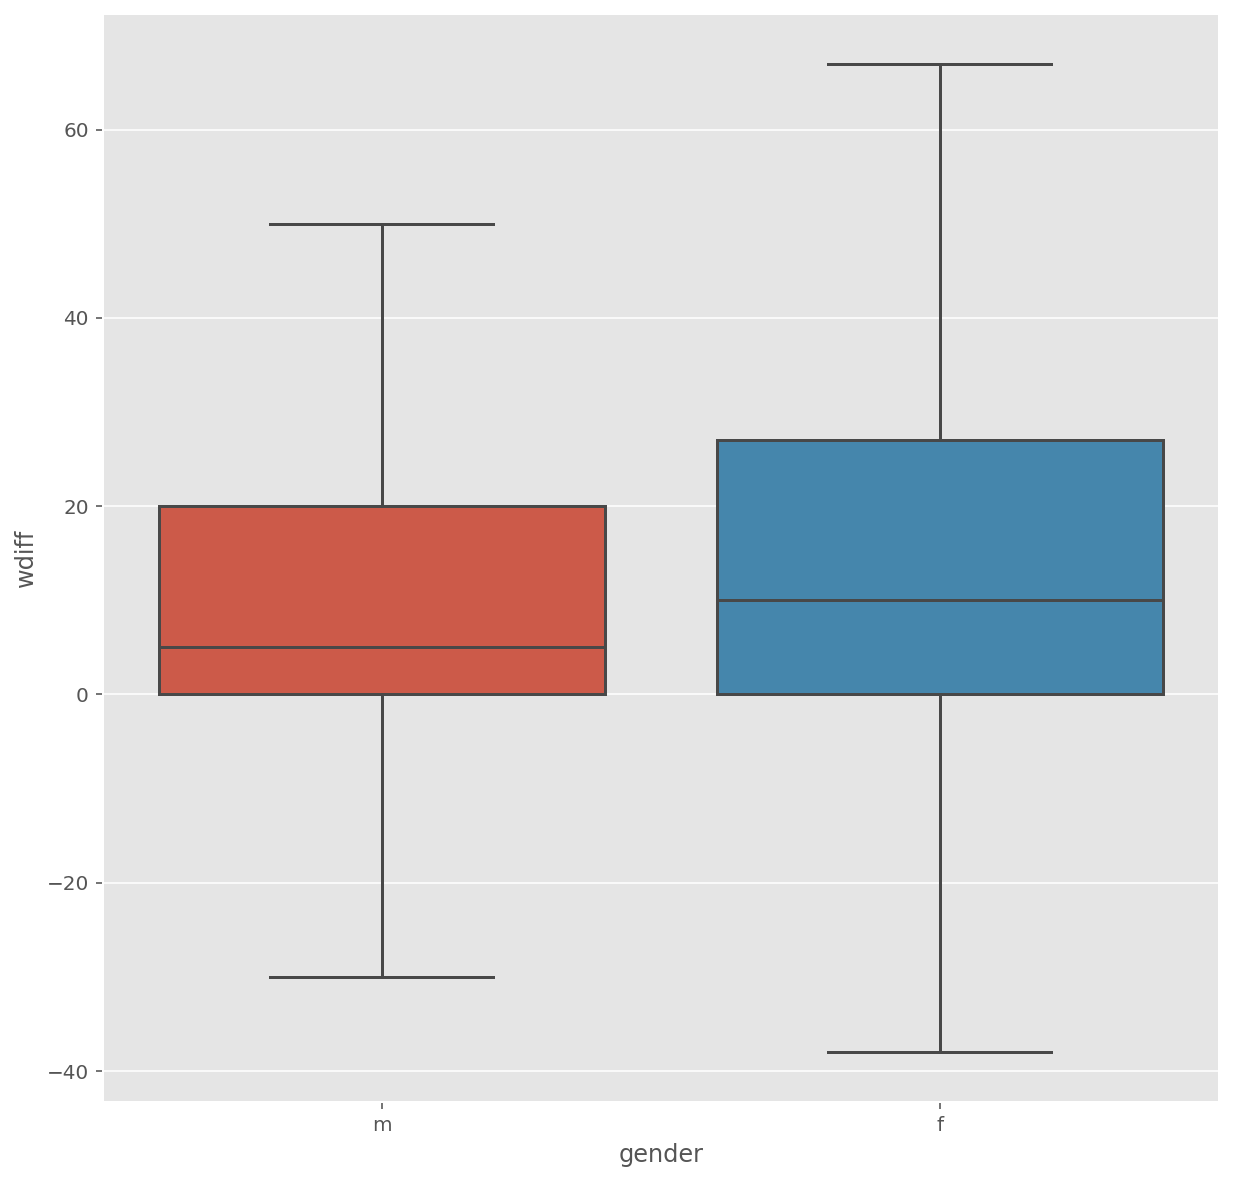

In [83]:
# Create a side-by-side boxplot to determine if men tend to view their weight differently than women.
import seaborn as sns
sns.boxplot(x = df['gender'], y = df['wdiff'], showfliers=True)
plt.show()

#or

sns.boxplot(x = df['gender'], y = df['wdiff'], showfliers=False)
plt.show()



This is a unimodial, right skewed graph.


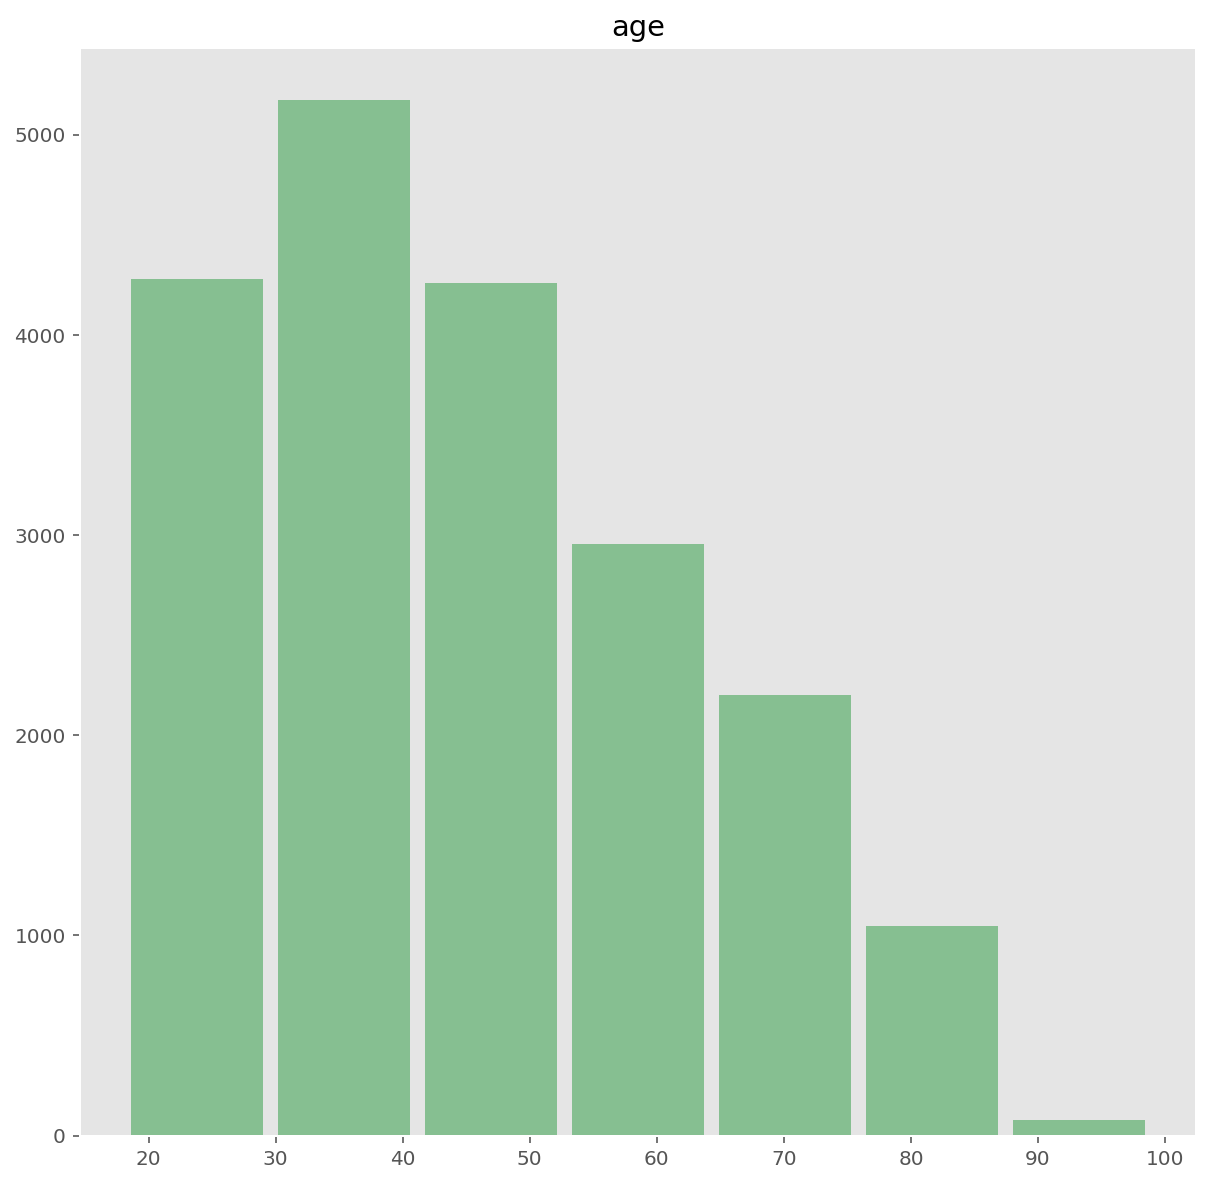

In [93]:
# Generate a histogram of age with the bin size of 7. Comment on the skewness and modality of this histogram.
from matplotlib.ticker import StrMethodFormatter
df.hist(column = 'age', bins = 7, color='#86bf91', zorder=2, rwidth=0.9, grid=False)

print("This is a unimodial, right skewed graph.")


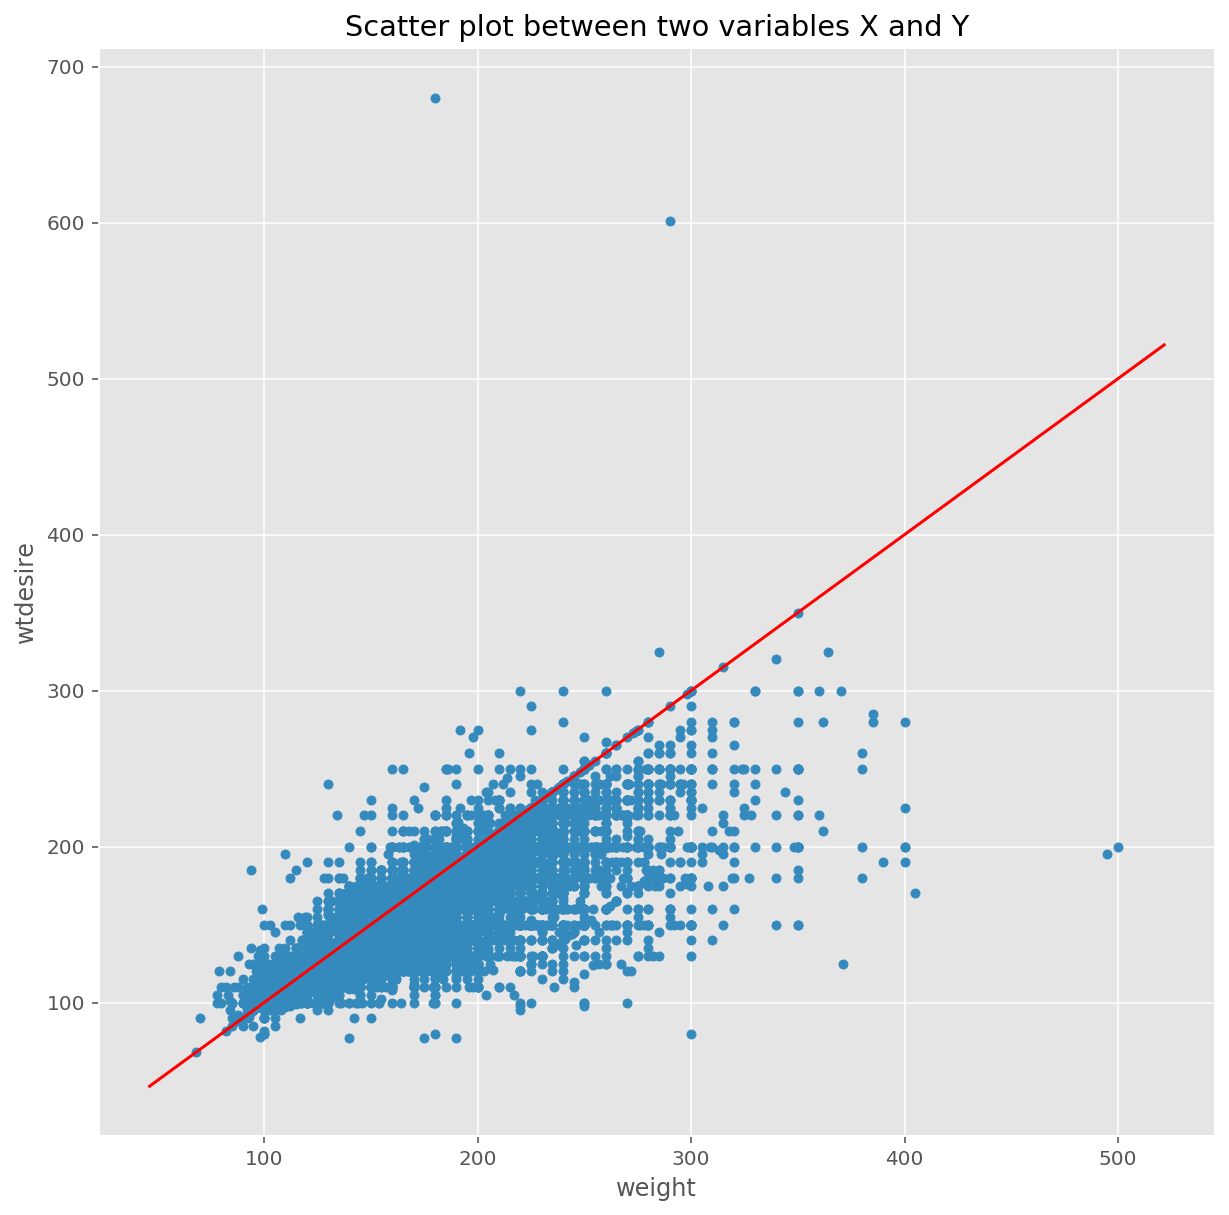

In [100]:
'''
Make a scatterplot of weight versus desired weight. Set the fill color as blue and alpha level as 0.3.
Describe the relationship between these two variables.
Also fit a red line with a slope of 1 and an intercept value of 0. See this for an example of a line fit.
'''
import matplotlib.pyplot as plot


df.plot.scatter(x='weight', y='wtdesire', title= "Scatter plot between two variables X and Y")

def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope + intercept, xmax*slope + intercept], **kargs)

plot_line(axis = plt.gca(), slope = 1, intercept = 0, color = "red")
plot.show(block=True)